In [1]:
# Import necessary packages

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import linregress
from scipy.stats import norm
from operator import itemgetter
from sklearn.model_selection import cross_val_score

In [2]:
# Import the datasets

dfAllPlayers = pd.read_csv('all-players-final-data.csv')
dfGuards = pd.read_csv('guards-final-data.csv')
dfForwards = pd.read_csv('forwards-final-data.csv')
dfCenters = pd.read_csv('centers-final-data.csv')

dfDCallPlayers = pd.read_csv('all-draft-class-final-data.csv')
dfDCguards = pd.read_csv('draft-class-guards-final-data.csv')
dfDCforwards = pd.read_csv('draft-class-forwards-final-data.csv')
dfDCcenters = pd.read_csv('draft-class-centers-final-data.csv')

In [3]:
# Preview the all players dataset

dfAllPlayers.head()

,Player,Position,Wingspan (in),Height (in),Seasons in College,G-Col,MPG-Col,STL-Col,BLK-Col,PF-Col,...,DWS-Col,DWS/40-Col,DBPM-Col,G-NBA,MPG-NBA,STL-NBA,BLK-NBA,DWS-NBA,DWS/48-NBA,DBPM-NBA
0,Markelle Fultz,SG,81.0,76.0,1,25.0,35.7,1.6,1.2,2.5,...,0.5,0.022,1.4,14,18.1,0.9,0.3,0.4,0.076,0.8
1,Lonzo Ball,PG,80.5,78.0,1,36.0,35.1,1.8,0.8,1.8,...,2.0,0.063,3.5,52,34.2,1.7,0.8,2.5,0.067,2.5
2,Jayson Tatum,SF,83.0,80.0,1,29.0,33.3,1.3,1.1,3.0,...,1.8,0.075,4.1,80,30.5,1.0,0.7,4.0,0.079,1.5
3,Josh Jackson,SF,82.0,80.0,1,35.0,30.8,1.7,1.1,3.0,...,2.2,0.082,5.7,77,25.4,1.0,0.5,1.2,0.029,-1.2
4,De'Aaron Fox,PG,78.0,76.0,1,36.0,29.6,1.5,0.2,2.5,...,2.1,0.079,3.7,73,27.8,1.0,0.3,1.1,0.026,-1.5


In [4]:
# Preview one of the positional datasets

dfGuards.head()

,Player,Position,Wingspan (in),Height (in),Seasons in College,G-Col,MPG-Col,STL-Col,BLK-Col,PF-Col,...,DWS-Col,DWS/40-Col,DBPM-Col,G-NBA,MPG-NBA,STL-NBA,BLK-NBA,DWS-NBA,DWS/48-NBA,DBPM-NBA
0,Markelle Fultz,SG,81.0,76.0,1,25.0,35.7,1.6,1.2,2.5,...,0.5,0.022,1.4,14,18.1,0.9,0.3,0.4,0.076,0.8
1,Lonzo Ball,PG,80.5,78.0,1,36.0,35.1,1.8,0.8,1.8,...,2.0,0.063,3.5,52,34.2,1.7,0.8,2.5,0.067,2.5
2,De'Aaron Fox,PG,78.0,76.0,1,36.0,29.6,1.5,0.2,2.5,...,2.1,0.079,3.7,73,27.8,1.0,0.3,1.1,0.026,-1.5
3,Dennis Smith,PG,75.0,74.0,1,32.0,34.8,1.9,0.4,2.1,...,0.9,0.032,1.0,69,29.7,1.0,0.3,1.7,0.040,-0.7
4,Malik Monk,SG,78.0,76.0,1,38.0,32.1,0.9,0.5,1.9,...,1.9,0.062,1.3,63,13.6,0.3,0.1,0.5,0.028,-3.4


In [5]:
# Preview one of the draft class datasets

dfDCguards.head()

,Player,Position,Wingspan (in),Height (in),Seasons in College,G,MPG,STL,BLK,PF,STL%,BLK%,SOS,DWS,DWS/40,DBPM
0,Trae Young,PG,75.00,73.75,1,32,35.4,1.7,0.3,1.8,2.5,0.7,10.56,1.1,0.039,0.5
1,Collin Sexton,PG,79.25,73.50,1,33,29.9,0.8,0.1,2.5,1.6,0.3,10.64,1.2,0.049,0.0
2,Lonnie Walker IV,SG,82.25,76.50,1,32,27.8,0.9,0.5,1.6,2.0,1.8,6.96,1.3,0.058,1.6
3,SGA,PG,83.50,78.00,1,37,33.7,1.6,0.5,1.7,2.8,1.7,10.73,1.9,0.061,3.6
4,Aaron Holiday,PG,79.50,72.75,3,101,31.8,1.2,0.2,2.7,2.2,0.7,7.65,3.2,0.040,0.7


In [6]:
# Prepare draft class dataframes to be plugged into machine learning models by skipping columns that aren't parameters in the model

guardsTest = dfDCguards.iloc[:, [2, 3, 7, 8, 9, 10, 11, 12, 14, 15]]
forwardsTest = dfDCforwards.iloc[:, [2, 3, 7, 8, 9, 10, 11, 12, 14, 15]]
centersTest = dfDCcenters.iloc[:, [2, 3, 7, 8, 9, 10, 11, 12, 14, 15]]

guardsNames = dfDCguards.iloc[:, 0]
forwardsNames = dfDCforwards.iloc[:, 0]
centersNames = dfDCcenters.iloc[:, 0]

guardsTest.head()

,Wingspan (in),Height (in),STL,BLK,PF,STL%,BLK%,SOS,DWS/40,DBPM
0,75.00,73.75,1.7,0.3,1.8,2.5,0.7,10.56,0.039,0.5
1,79.25,73.50,0.8,0.1,2.5,1.6,0.3,10.64,0.049,0.0
2,82.25,76.50,0.9,0.5,1.6,2.0,1.8,6.96,0.058,1.6
3,83.50,78.00,1.6,0.5,1.7,2.8,1.7,10.73,0.061,3.6
4,79.50,72.75,1.2,0.2,2.7,2.2,0.7,7.65,0.040,0.7


# Correlation between college and NBA DBPM 

College DBPM and NBA DBPM: slope = 0.4411337886859731 , intercept = -1.7366204996114194 , r_value = 0.677989720681085 , p_value = 2.306125483866736e-24 , std_err = 0.0367903041333715


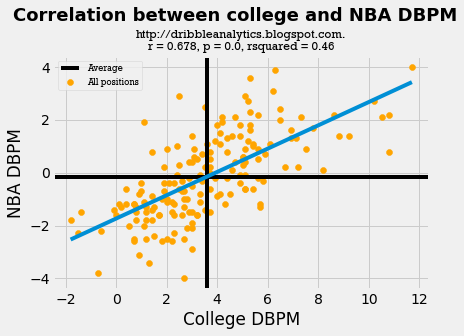

In [7]:
# Let's look at the basic correlation between college DBPM and NBA DBPM for all positions

plt.style.use('fivethirtyeight')
 
dbpmAllPlayers, ax = plt.subplots()

ax.scatter(dfAllPlayers['DBPM-Col'], dfAllPlayers['DBPM-NBA'], color = 'orange', label = "All positions")
ax.axvline(x = np.mean(dfAllPlayers['DBPM-Col']), color = 'black')
ax.axhline(y = np.mean(dfAllPlayers['DBPM-NBA']), label = "Average", color = 'black')
dbpmAllPlayers.suptitle("Correlation between college and NBA DBPM", weight = 'bold', size = 18, y = 1.05)
ax.set_xlabel("College DBPM")
ax.set_ylabel("NBA DBPM")
 
ax.plot(np.unique(dfAllPlayers['DBPM-Col']), np.poly1d(np.polyfit(dfAllPlayers['DBPM-Col'], dfAllPlayers['DBPM-NBA'], 1))(np.unique(dfAllPlayers['DBPM-Col'])))

ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"})
 
slope, intercept, r_value, p_value, std_err = linregress(dfAllPlayers['DBPM-Col'], dfAllPlayers['DBPM-NBA'])
print("College DBPM and NBA DBPM: slope =", slope, ", intercept =", intercept, ", r_value =", r_value,
    ", p_value =", p_value, ", std_err =", std_err)
rsqaured = r_value ** 2
rpString = "r = " + str(round(r_value, 3)) + ", p = " + str(round(p_value, 3)) + ", rsquared = " + str(round(rsqaured, 3))

ax.set_title("http://dribbleanalytics.blogspot.com.\n%s"%rpString, size = 12, fontname = 'Rockwell')
dbpmAllPlayers.savefig('dbpm-all-players.png', dpi = 400, bbox_inches = 'tight')

College DBPM and NBA DBPM for guards: slope = 0.526762369126005 , intercept = -2.0349001279108925 , r_value = 0.6134219438603592 , p_value = 3.832944641601022e-09 , std_err = 0.07883737459430039


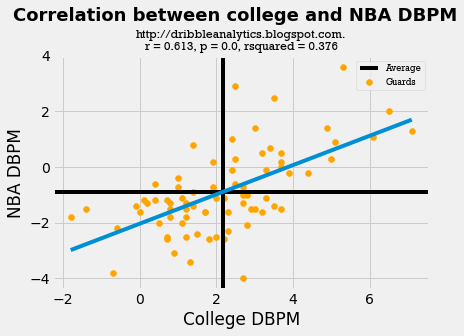

In [8]:
# Like with DWS, the regression looks pretty good. Let's look at it for each position.

plt.style.use('fivethirtyeight')
 
dbpmGuards, ax = plt.subplots()

ax.scatter(dfGuards['DBPM-Col'], dfGuards['DBPM-NBA'], color = 'orange', label = "Guards")
ax.axvline(x = np.mean(dfGuards['DBPM-Col']), color = 'black')
ax.axhline(y = np.mean(dfGuards['DBPM-NBA']), label = "Average", color = 'black')
dbpmGuards.suptitle("Correlation between college and NBA DBPM", weight = 'bold', size = 18, y = 1.05)
ax.set_xlabel("College DBPM")
ax.set_ylabel("NBA DBPM")
 
ax.plot(np.unique(dfGuards['DBPM-Col']), np.poly1d(np.polyfit(dfGuards['DBPM-Col'], dfGuards['DBPM-NBA'], 1))(np.unique(dfGuards['DBPM-Col'])))

ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"})
 
slope, intercept, r_value, p_value, std_err = linregress(dfGuards['DBPM-Col'], dfGuards['DBPM-NBA'])
print("College DBPM and NBA DBPM for guards: slope =", slope, ", intercept =", intercept, ", r_value =", r_value,
    ", p_value =", p_value, ", std_err =", std_err)
rsqaured = r_value ** 2
rpString = "r = " + str(round(r_value, 3)) + ", p = " + str(round(p_value, 3)) + ", rsquared = " + str(round(rsqaured, 3))

ax.set_title("http://dribbleanalytics.blogspot.com.\n%s"%rpString, size = 12, fontname = 'Rockwell')
dbpmGuards.savefig('dbpm-guards.png', dpi = 400, bbox_inches = 'tight')

College DBPM and NBA DBPM for forwards: slope = 0.38725021082253963 , intercept = -1.5775548821372418 , r_value = 0.5266427979511703 , p_value = 3.9651267833768405e-06 , std_err = 0.07694258215301027


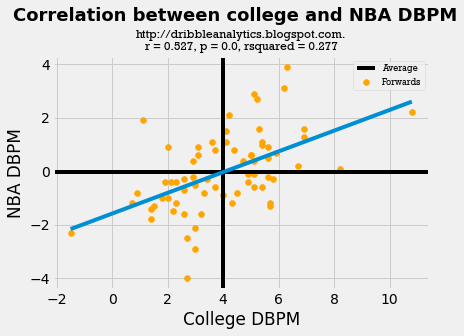

In [9]:
plt.style.use('fivethirtyeight')
 
dbpmForwards, ax = plt.subplots()

ax.scatter(dfForwards['DBPM-Col'], dfForwards['DBPM-NBA'], color = 'orange', label = "Forwards")
ax.axvline(x = np.mean(dfForwards['DBPM-Col']), color = 'black')
ax.axhline(y = np.mean(dfForwards['DBPM-NBA']), label = "Average", color = 'black')
dbpmForwards.suptitle("Correlation between college and NBA DBPM", weight = 'bold', size = 18, y = 1.05)
ax.set_xlabel("College DBPM")
ax.set_ylabel("NBA DBPM")
 
ax.plot(np.unique(dfForwards['DBPM-Col']), np.poly1d(np.polyfit(dfForwards['DBPM-Col'], dfForwards['DBPM-NBA'], 1))(np.unique(dfForwards['DBPM-Col'])))

ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"})
 
slope, intercept, r_value, p_value, std_err = linregress(dfForwards['DBPM-Col'], dfForwards['DBPM-NBA'])
print("College DBPM and NBA DBPM for forwards: slope =", slope, ", intercept =", intercept, ", r_value =", r_value,
    ", p_value =", p_value, ", std_err =", std_err)
rsqaured = r_value ** 2
rpString = "r = " + str(round(r_value, 3)) + ", p = " + str(round(p_value, 3)) + ", rsquared = " + str(round(rsqaured, 3))

ax.set_title("http://dribbleanalytics.blogspot.com.\n%s"%rpString, size = 12, fontname = 'Rockwell')
dbpmForwards.savefig('dbpm-forwards.png', dpi = 400, bbox_inches = 'tight')

College DBPM and NBA DBPM for centers: slope = 0.24421092078759593 , intercept = -0.20773386630857438 , r_value = 0.5155117082971359 , p_value = 0.004208690770508384 , std_err = 0.0781206695199647


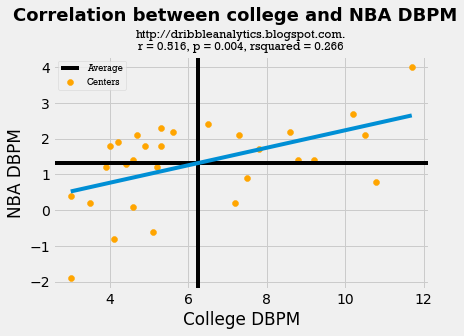

In [10]:
plt.style.use('fivethirtyeight')
 
dbpmCenters, ax = plt.subplots()

ax.scatter(dfCenters['DBPM-Col'], dfCenters['DBPM-NBA'], color = 'orange', label = "Centers")
ax.axvline(x = np.mean(dfCenters['DBPM-Col']), color = 'black')
ax.axhline(y = np.mean(dfCenters['DBPM-NBA']), label = "Average", color = 'black')
dbpmCenters.suptitle("Correlation between college and NBA DBPM", weight = 'bold', size = 18, y = 1.05)
ax.set_xlabel("College DBPM")
ax.set_ylabel("NBA DBPM")
 
ax.plot(np.unique(dfCenters['DBPM-Col']), np.poly1d(np.polyfit(dfCenters['DBPM-Col'], dfCenters['DBPM-NBA'], 1))(np.unique(dfCenters['DBPM-Col'])))

ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"})
 
slope, intercept, r_value, p_value, std_err = linregress(dfCenters['DBPM-Col'], dfCenters['DBPM-NBA'])
print("College DBPM and NBA DBPM for centers: slope =", slope, ", intercept =", intercept, ", r_value =", r_value,
    ", p_value =", p_value, ", std_err =", std_err)
rsqaured = r_value ** 2
rpString = "r = " + str(round(r_value, 3)) + ", p = " + str(round(p_value, 3)) + ", rsquared = " + str(round(rsqaured, 3))

ax.set_title("http://dribbleanalytics.blogspot.com.\n%s"%rpString, size = 12, fontname = 'Rockwell')
dbpmCenters.savefig('dbpm-centers.png', dpi = 400, bbox_inches = 'tight')

# Histograms of steals and blocks

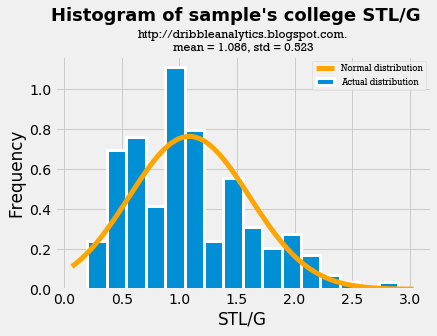

In [11]:
plt.style.use('fivethirtyeight')
stlHistCollege, ax = plt.subplots()

ax.hist(dfAllPlayers['STL-Col'], bins = 16, edgecolor = 'white', linewidth = 3, normed = True, label = "Actual distribution")
stlHistCollege.suptitle("Histogram of sample's college STL/G", weight = 'bold', size = 18, y = 1.05)
ax.set_xlabel("STL/G")
ax.set_ylabel("Frequency")

overall_mean = dfAllPlayers['STL-Col'].mean()
overall_std = dfAllPlayers['STL-Col'].std()

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, overall_mean, overall_std)
ax.plot(x, p, 'k', linewidth=5, color='orange', label = "Normal distribution")

ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"})
ax.set_title("http://dribbleanalytics.blogspot.com.\nmean = %.3f, std = %.3f"%(overall_mean, overall_std), size = 12, fontname = 'Rockwell')

stlHistCollege.savefig('stl-hist-college.png', dpi = 400, bbox_inches = 'tight')

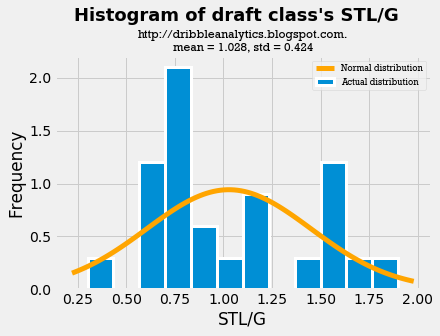

In [12]:
plt.style.use('fivethirtyeight')
stlHistDC, ax = plt.subplots()

ax.hist(dfDCallPlayers['STL'], bins = 12, edgecolor = 'white', linewidth = 3, normed = True, label = "Actual distribution")
stlHistDC.suptitle("Histogram of draft class's STL/G", weight = 'bold', size = 18, y = 1.05)
ax.set_xlabel("STL/G")
ax.set_ylabel("Frequency")

overall_mean = dfDCallPlayers['STL'].mean()
overall_std = dfDCallPlayers['STL'].std()

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, overall_mean, overall_std)
ax.plot(x, p, 'k', linewidth=5, color='orange', label = "Normal distribution")

ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"})
ax.set_title("http://dribbleanalytics.blogspot.com.\nmean = %.3f, std = %.3f"%(overall_mean, overall_std), size = 12, fontname = 'Rockwell')

stlHistDC.savefig('stl-hist-dc.png', dpi = 400, bbox_inches = 'tight')

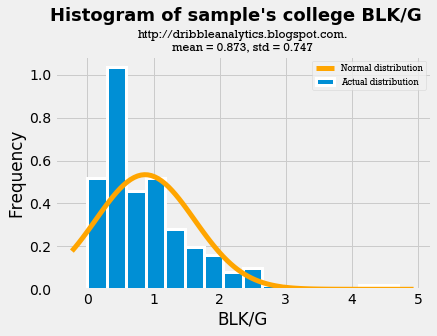

In [13]:
plt.style.use('fivethirtyeight')
blkHistCollege, ax = plt.subplots()

ax.hist(dfAllPlayers['BLK-Col'], bins = 16, edgecolor = 'white', linewidth = 3, normed = True, label = "Actual distribution")
blkHistCollege.suptitle("Histogram of sample's college BLK/G", weight = 'bold', size = 18, y = 1.05)
ax.set_xlabel("BLK/G")
ax.set_ylabel("Frequency")

overall_mean = dfAllPlayers['BLK-Col'].mean()
overall_std = dfAllPlayers['BLK-Col'].std()

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, overall_mean, overall_std)
ax.plot(x, p, 'k', linewidth=5, color='orange', label = "Normal distribution")

ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"})
ax.set_title("http://dribbleanalytics.blogspot.com.\nmean = %.3f, std = %.3f"%(overall_mean, overall_std), size = 12, fontname = 'Rockwell')

blkHistCollege.savefig('blk-hist-college.png', dpi = 400, bbox_inches = 'tight')

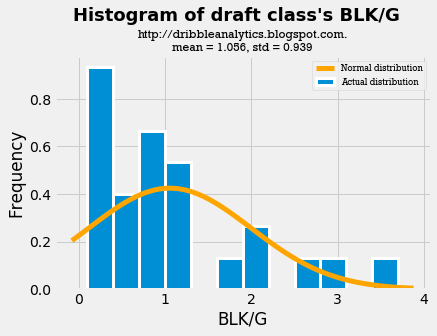

In [14]:
plt.style.use('fivethirtyeight')
blkHistDC, ax = plt.subplots()

ax.hist(dfDCallPlayers['BLK'], bins = 12, edgecolor = 'white', linewidth = 3, normed = True, label = "Actual distribution")
blkHistDC.suptitle("Histogram of draft class's BLK/G", weight = 'bold', size = 18, y = 1.05)
ax.set_xlabel("BLK/G")
ax.set_ylabel("Frequency")

overall_mean = dfDCallPlayers['BLK'].mean()
overall_std = dfDCallPlayers['BLK'].std()

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, overall_mean, overall_std)
ax.plot(x, p, 'k', linewidth=5, color='orange', label = "Normal distribution")

ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"})
ax.set_title("http://dribbleanalytics.blogspot.com.\nmean = %.3f, std = %.3f"%(overall_mean, overall_std), size = 12, fontname = 'Rockwell')

blkHistDC.savefig('blk-hist-dc.png', dpi = 400, bbox_inches = 'tight')

# Create machine learning model for guards

In [15]:
train, test = train_test_split(dfGuards, test_size = 0.2, random_state = 99)

xtrain = train[['Wingspan (in)', 'Height (in)', 'STL-Col', 'BLK-Col', 'PF-Col', 'STL%-Col', 'BLK%-Col', 'SOS-Col', 'DWS/40-Col', 'DBPM-Col']]
ytrain = train[['DBPM-NBA']]
 
xtest = test[['Wingspan (in)', 'Height (in)', 'STL-Col', 'BLK-Col', 'PF-Col', 'STL%-Col', 'BLK%-Col', 'SOS-Col', 'DWS/40-Col', 'DBPM-Col']]
ytest = test[['DBPM-NBA']]

In [16]:
linReg = linear_model.LinearRegression(fit_intercept = False)
linReg.fit(xtrain, ytrain)

y_predLin = linReg.predict(xtest)

print("Mean squared error: %.3f" % mean_squared_error(ytest, y_predLin))
print('Variance score: %.3f' % r2_score(ytest, y_predLin))

cvScoreLin = cross_val_score(linReg, xtest, ytest, cv = 4, scoring = 'explained_variance')
print("Accuracy (cross validation score): %0.2f (+/- %0.2f)" % (cvScoreLin.mean(), cvScoreLin.std() * 2))

Mean squared error: 0.755
Variance score: 0.622
Accuracy (cross validation score): -1.06 (+/- 3.84)


In [17]:
ridgeReg = linear_model.Ridge(alpha = 5, fit_intercept = False)
ridgeReg.fit(xtrain, ytrain)

y_predRidge = ridgeReg.predict(xtest)

print("Mean squared error: %.3f" % mean_squared_error(ytest, y_predRidge))
print('Variance score: %.3f' % r2_score(ytest, y_predRidge))

cvScoreRidge = cross_val_score(ridgeReg, xtest, ytest, cv = 4, scoring = 'explained_variance')
print("Accuracy (cross validation score): %0.2f (+/- %0.2f)" % (cvScoreRidge.mean(), cvScoreRidge.std() * 2))

Mean squared error: 0.538
Variance score: 0.731
Accuracy (cross validation score): 0.78 (+/- 0.20)


In [18]:
lassoReg = linear_model.Lasso(alpha = .1, max_iter = 100000, fit_intercept = False)
lassoReg.fit(xtrain, ytrain)

y_predLasso = lassoReg.predict(xtest)

print("Mean squared error: %.3f" % mean_squared_error(ytest, y_predLasso))
print('Variance score: %.3f' % r2_score(ytest, y_predLasso))

cvScoreLasso = cross_val_score(lassoReg, xtest, ytest, cv = 4, scoring = 'explained_variance')
print("Accuracy (cross validation score): %0.2f (+/- %0.2f)" % (cvScoreLasso.mean(), cvScoreLasso.std() * 2))

Mean squared error: 0.499
Variance score: 0.751
Accuracy (cross validation score): 0.72 (+/- 0.33)


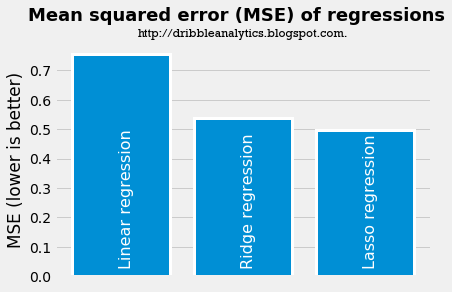

In [19]:
plt.style.use('fivethirtyeight')
mseGuards, ax = plt.subplots()

mseScores = [mean_squared_error(ytest, y_predLin), mean_squared_error(ytest, y_predRidge), mean_squared_error(ytest, y_predLasso)]
x_pos = np.arange(len(mseScores))

ax.bar(x_pos, mseScores, edgecolor = 'white', linewidth = 3)

mseNames = ["Linear regression", "Ridge regression", "Lasso regression"]

labels = [i for i in mseNames]

rects = ax.patches
for rect, label in zip(rects, labels):
    height = .025
    ax.text(rect.get_x() + rect.get_width() / 1.8, height, label,
            ha='center', va='bottom', rotation = 'vertical', color = 'white', size = 16)

mseGuards.suptitle("Mean squared error (MSE) of regressions", weight = 'bold', size = 18, y = 1.005)
ax.set_title("http://dribbleanalytics.blogspot.com.", size = 12, fontname = 'Rockwell')
ax.xaxis.set_visible(False)
ax.set_ylabel("MSE (lower is better)")

mseGuards.savefig('mse-guards.png', dpi = 400, bbox_inches = 'tight')

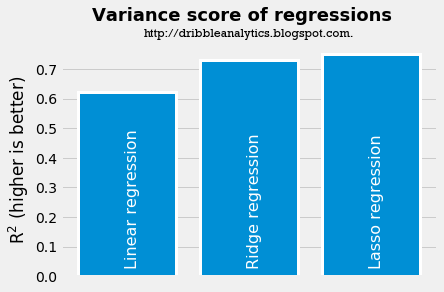

In [20]:
# Let's graph the variance score of all three models

r2guards, ax = plt.subplots()

r2scores = [r2_score(ytest, y_predLin), r2_score(ytest, y_predRidge), r2_score(ytest, y_predLasso)]
x_pos = np.arange(len(r2scores))

ax.bar(x_pos, r2scores, edgecolor = 'white', linewidth = 3)

r2names = ["Linear regression", "Ridge regression", "Lasso regression"]

labels = [i for i in r2names]

rects = ax.patches
for rect, label in zip(rects, labels):
    height = .025
    ax.text(rect.get_x() + rect.get_width() / 1.8, height, label,
            ha='center', va='bottom', rotation = 'vertical', color = 'white', size = 16)

r2guards.suptitle("Variance score of regressions", weight = 'bold', size = 18, y = 1.005)
ax.set_title("http://dribbleanalytics.blogspot.com.", size = 12, fontname = 'Rockwell')
ax.xaxis.set_visible(False)
ax.set_ylabel(r"R$^{\rm 2}$ (higher is better)")

r2guards.savefig('r2-guards.png', dpi = 400, bbox_inches = 'tight')

# Predict defense for guards using the models

In [21]:
linear_guards = linReg.predict(guardsTest)

for i, j in zip(linear_guards, guardsNames):
    print(i, j)

[-0.99880167] Trae Young
[-1.9692345] Collin Sexton
[-1.57731988] Lonnie Walker IV
[-0.19151891] SGA
[-1.12915504] Aaron Holiday
[-0.60329914] Troy Brown Jr.
[-0.55166296] Kevin Huerter
[-1.18509868] Chandler Hutchison
[-1.26538078] Jerome Robinson
[0.69006756] Khyri Thomas
[-1.72385458] Grayson Allen
[-1.23672028] Donte DiVincenzo
[0.04498612] Josh Okogie
[1.14199042] De'Anthony Melton
[-2.04998088] Jalen Brunson


In [22]:
ridge_guards = ridgeReg.predict(guardsTest)

for i, j in zip(ridge_guards, guardsNames):
    print(i, j)

[-1.46238804] Trae Young
[-1.99457455] Collin Sexton
[-1.38284664] Lonnie Walker IV
[-0.36926789] SGA
[-1.33312413] Aaron Holiday
[-0.70359826] Troy Brown Jr.
[-0.53697146] Kevin Huerter
[-0.83119582] Chandler Hutchison
[-1.58913295] Jerome Robinson
[-0.68634983] Khyri Thomas
[-1.71113429] Grayson Allen
[-0.91902485] Donte DiVincenzo
[-0.11557213] Josh Okogie
[1.37237949] De'Anthony Melton
[-1.91771947] Jalen Brunson


In [23]:
lasso_guards = lassoReg.predict(guardsTest)

for i, j in zip(lasso_guards, guardsNames):
    print(i, j)

-1.5888155215514859 Trae Young
-2.11323664405412 Collin Sexton
-1.229705916760949 Lonnie Walker IV
-0.3648115054381733 SGA
-1.5585680444158183 Aaron Holiday
-0.6329160045554454 Troy Brown Jr.
-0.5586474006867648 Kevin Huerter
-0.605515551134852 Chandler Hutchison
-1.7711314472898476 Jerome Robinson
-0.5766130937246771 Khyri Thomas
-1.626198678787169 Grayson Allen
-0.6885373218995732 Donte DiVincenzo
-0.5301926515815237 Josh Okogie
1.1138468842375158 De'Anthony Melton
-1.7051230361797125 Jalen Brunson


[['Jalen Brunson', -2.049980882899154], ['Collin Sexton', -1.969234498966422], ['Grayson Allen', -1.7238545790830162], ['Lonnie Walker IV', -1.5773198843735108], ['Jerome Robinson', -1.2653807811310913], ['Donte DiVincenzo', -1.2367202842063076], ['Chandler Hutchison', -1.1850986763314026], ['Aaron Holiday', -1.1291550400531767], ['Trae Young', -0.9988016735527824], ['Troy Brown Jr.', -0.6032991387796269], ['Kevin Huerter', -0.5516629552678993], ['SGA', -0.19151891281998798], ['Josh Okogie', 0.04498611887439928], ['Khyri Thomas', 0.690067561422278], ["De'Anthony Melton", 1.1419904158240461]]


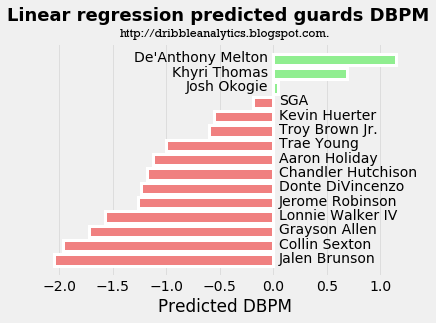

In [24]:
# Let's plot the linear regression predictions

plt.style.use('fivethirtyeight')
linRegGuards, ax = plt.subplots()

linearPlot = []

for i in linear_guards:
    linearPlot.append(float(i))
    
combinedLinear = [[i, j] for i, j in zip(guardsNames, linearPlot)]

sortedLinear = sorted(combinedLinear, key = itemgetter(1))
print(sortedLinear)

sortedLinearData = [row[1] for row in sortedLinear]
y_pos = np.arange(len(sortedLinearData))

colorList = []

for i in sortedLinearData:
    if i < 0:
        colorList.append('lightcoral')
    elif i > 0:
        colorList.append('lightgreen')

ax.barh(y_pos, sortedLinearData, color = colorList, edgecolor = 'white', linewidth = 3)

labels = [row[0] for row in sortedLinear]

rects = ax.patches
for rect, label in zip(rects, labels):
    height = rect.get_y()
    if rect.get_y() < 11:
        ax.text(rect.get_x() + .05, height, label,
        ha='left', va='bottom', color = 'black')
    elif rect.get_y() >= 11:
        ax.text(rect.get_x() - .05, height, label,
        ha='right', va='bottom', color = 'black')

linRegGuards.suptitle("Linear regression predicted guards DBPM", weight = 'bold', size = 18, y = 1.005)
ax.set_title("http://dribbleanalytics.blogspot.com.", size = 12, fontname = 'Rockwell')
ax.yaxis.set_visible(False)
ax.set_xlabel("Predicted DBPM")
ax.grid(alpha = .5)

linRegGuards.savefig('lin-reg-guards.png', dpi = 400, bbox_inches = 'tight')

[['Collin Sexton', -1.994574551820644], ['Jalen Brunson', -1.917719470717073], ['Grayson Allen', -1.7111342863217627], ['Jerome Robinson', -1.589132951140553], ['Trae Young', -1.462388038874518], ['Lonnie Walker IV', -1.3828466403404691], ['Aaron Holiday', -1.3331241318956715], ['Donte DiVincenzo', -0.9190248534896369], ['Chandler Hutchison', -0.8311958194110151], ['Troy Brown Jr.', -0.7035982611663478], ['Khyri Thomas', -0.6863498346540196], ['Kevin Huerter', -0.536971455227164], ['SGA', -0.36926788823043294], ['Josh Okogie', -0.11557212758300447], ["De'Anthony Melton", 1.3723794899190627]]


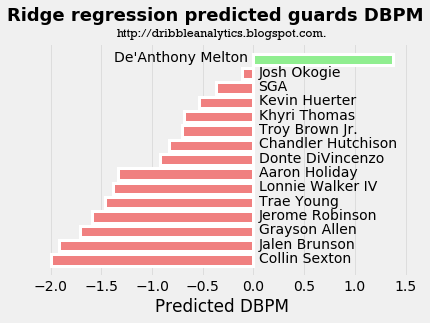

In [25]:
# Let's plot the ridge regression predictions

plt.style.use('fivethirtyeight')
ridgeRegGuards, ax = plt.subplots()

ridgePlot = []

for i in ridge_guards:
    ridgePlot.append(float(i))
    
combinedRidge = [[i, j] for i, j in zip(guardsNames, ridgePlot)]

sortedRidge = sorted(combinedRidge, key = itemgetter(1))
print(sortedRidge)

sortedRidgeData = [row[1] for row in sortedRidge]
y_pos = np.arange(len(sortedRidgeData))

colorList = []

for i in sortedRidgeData:
    if i < 0:
        colorList.append('lightcoral')
    elif i > 0:
        colorList.append('lightgreen')

ax.barh(y_pos, sortedRidgeData, color = colorList, edgecolor = 'white', linewidth = 3)

labels = [row[0] for row in sortedRidge]

rects = ax.patches
for rect, label in zip(rects, labels):
    height = rect.get_y()
    if rect.get_y() < 13:
        ax.text(rect.get_x() + .05, height, label,
        ha='left', va='bottom', color = 'black')
    elif rect.get_y() >= 13:
        ax.text(rect.get_x() - .05, height, label,
        ha='right', va='bottom', color = 'black')
        
ridgeRegGuards.suptitle("Ridge regression predicted guards DBPM", weight = 'bold', size = 18, y = 1.005)
ax.set_title("http://dribbleanalytics.blogspot.com.", size = 12, fontname = 'Rockwell')
ax.yaxis.set_visible(False)
ax.set_xlabel("Predicted DBPM")
ax.grid(alpha = .5)

ridgeRegGuards.savefig('ridge-reg-guards.png', dpi = 400, bbox_inches = 'tight')

[['Collin Sexton', -2.11323664405412], ['Jerome Robinson', -1.7711314472898476], ['Jalen Brunson', -1.7051230361797125], ['Grayson Allen', -1.626198678787169], ['Trae Young', -1.5888155215514859], ['Aaron Holiday', -1.5585680444158183], ['Lonnie Walker IV', -1.229705916760949], ['Donte DiVincenzo', -0.6885373218995732], ['Troy Brown Jr.', -0.6329160045554454], ['Chandler Hutchison', -0.605515551134852], ['Khyri Thomas', -0.5766130937246771], ['Kevin Huerter', -0.5586474006867648], ['Josh Okogie', -0.5301926515815237], ['SGA', -0.3648115054381733], ["De'Anthony Melton", 1.1138468842375158]]


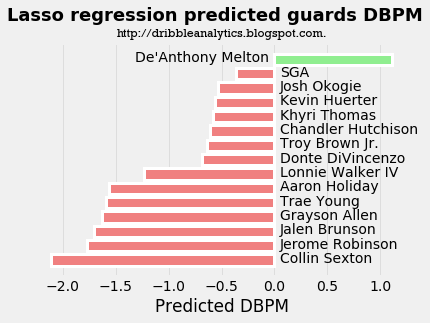

In [26]:
# Let's plot the lasso regression predictions

plt.style.use('fivethirtyeight')
lassoRegGuards, ax = plt.subplots()

lassoPlot = []

for i in lasso_guards:
    lassoPlot.append(float(i))
    
combinedLasso = [[i, j] for i, j in zip(guardsNames, lassoPlot)]

sortedLasso = sorted(combinedLasso, key = itemgetter(1))
print(sortedLasso)

sortedLassoData = [row[1] for row in sortedLasso]
y_pos = np.arange(len(sortedLassoData))

colorList = []

for i in sortedLassoData:
    if i < 0:
        colorList.append('lightcoral')
    elif i > 0:
        colorList.append('lightgreen')
        
ax.barh(y_pos, sortedLassoData, color = colorList, edgecolor = 'white', linewidth = 3)

labels = [row[0] for row in sortedLasso]

rects = ax.patches
for rect, label in zip(rects, labels):
    height = rect.get_y()
    if rect.get_y() < 13:
        ax.text(rect.get_x() + .05, height, label,
        ha='left', va='bottom', color = 'black')
    elif rect.get_y() >= 13:
        ax.text(rect.get_x() - .05, height, label,
        ha='right', va='bottom', color = 'black')

lassoRegGuards.suptitle("Lasso regression predicted guards DBPM", weight = 'bold', size = 18, y = 1.005)
ax.set_title("http://dribbleanalytics.blogspot.com.", size = 12, fontname = 'Rockwell')
ax.yaxis.set_visible(False)
ax.set_xlabel("Predicted DBPM")
ax.grid(alpha = .5)

lassoRegGuards.savefig('lasso-reg-guards.png', dpi = 400, bbox_inches = 'tight')

[['Collin Sexton', -2.025681898280395], ['Jalen Brunson', -1.8909411299319796], ['Grayson Allen', -1.6870625147306493], ['Jerome Robinson', -1.5418817265204972], ['Lonnie Walker IV', -1.3966241471583096], ['Trae Young', -1.3500017446595953], ['Aaron Holiday', -1.3402824054548887], ['Donte DiVincenzo', -0.948094153198506], ['Chandler Hutchison', -0.8739366822924232], ['Troy Brown Jr.', -0.64660446816714], ['Kevin Huerter', -0.5490939370606094], ['SGA', -0.3085327688295314], ['Josh Okogie', -0.20025955343004298], ['Khyri Thomas', -0.19096512231880622], ["De'Anthony Melton", 1.2094055966602082]]


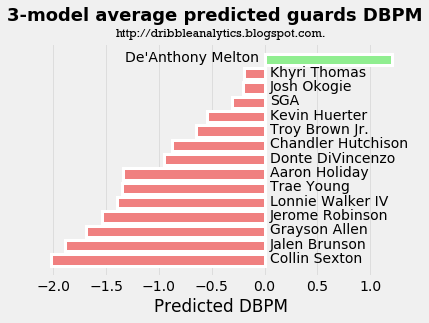

In [27]:
# Let's see who has the highest average DBPM among the three models

avgGuards, ax = plt.subplots()

averagePred = []

for i, j, h in zip(linear_guards, ridge_guards, lasso_guards):
    averagePred.append(float((i + j + h) / 3))

combinedAvg = [[i, j] for i, j in zip(guardsNames, averagePred)]

sortedAvg = sorted(combinedAvg, key = itemgetter(1))
print(sortedAvg)

sortedAvgData = [row[1] for row in sortedAvg]
y_pos = np.arange(len(sortedAvgData))

colorList = []

for i in sortedAvgData:
    if i < 0:
        colorList.append('lightcoral')
    elif i > 0:
        colorList.append('lightgreen')

ax.barh(y_pos, sortedAvgData, color = colorList, edgecolor = 'white', linewidth = 3)

labels = [row[0] for row in sortedAvg]

rects = ax.patches
for rect, label in zip(rects, labels):
    height = rect.get_y()
    if rect.get_y() < 13:
        ax.text(rect.get_x() + .05, height, label,
        ha='left', va='bottom', color = 'black')
    elif rect.get_y() >= 13:
        ax.text(rect.get_x() - .05, height, label,
        ha='right', va='bottom', color = 'black')

avgGuards.suptitle("3-model average predicted guards DBPM", weight = 'bold', size = 18, y = 1.005)
ax.set_title("http://dribbleanalytics.blogspot.com.", size = 12, fontname = 'Rockwell')
ax.yaxis.set_visible(False)
ax.set_xlabel("Predicted DBPM")
ax.grid(alpha = .5)

avgGuards.savefig('avg-guards.png', dpi = 400, bbox_inches = 'tight')

# Create machine learning model for forwards

In [28]:
train, test = train_test_split(dfForwards, test_size = 0.25, random_state = 0)

xtrain = train[['Wingspan (in)', 'Height (in)', 'STL-Col', 'BLK-Col', 'PF-Col', 'STL%-Col', 'BLK%-Col', 'SOS-Col', 'DWS/40-Col', 'DBPM-Col']]
ytrain = train[['DBPM-NBA']]
 
xtest = test[['Wingspan (in)', 'Height (in)', 'STL-Col', 'BLK-Col', 'PF-Col', 'STL%-Col', 'BLK%-Col', 'SOS-Col', 'DWS/40-Col', 'DBPM-Col']]
ytest = test[['DBPM-NBA']]

In [29]:
linReg = linear_model.LinearRegression(fit_intercept = False)
linReg.fit(xtrain, ytrain)

y_predLin = linReg.predict(xtest)

print("Mean squared error: %.3f" % mean_squared_error(ytest, y_predLin))
print('Variance score: %.3f' % r2_score(ytest, y_predLin))

cvScoreLin = cross_val_score(linReg, xtest, ytest, cv = 4, scoring = 'explained_variance')
print("Accuracy (cross validation score): %0.2f (+/- %0.2f)" % (cvScoreLin.mean(), cvScoreLin.std() * 2))

Mean squared error: 2.329
Variance score: 0.373
Accuracy (cross validation score): -4.71 (+/- 7.66)


In [30]:
ridgeReg = linear_model.Ridge(alpha = .01, fit_intercept = False)
ridgeReg.fit(xtrain, ytrain)

y_predRidge = ridgeReg.predict(xtest)

print("Mean squared error: %.3f" % mean_squared_error(ytest, y_predRidge))
print('Variance score: %.3f' % r2_score(ytest, y_predRidge))

cvScoreRidge = cross_val_score(ridgeReg, xtest, ytest, cv = 4, scoring = 'explained_variance')
print("Accuracy (cross validation score): %0.2f (+/- %0.2f)" % (cvScoreRidge.mean(), cvScoreRidge.std() * 2))

Mean squared error: 2.336
Variance score: 0.371
Accuracy (cross validation score): -1.13 (+/- 0.93)


In [31]:
lassoReg = linear_model.Lasso(alpha = .0001, max_iter = 10000000, fit_intercept = False)
lassoReg.fit(xtrain, ytrain)

y_predLasso = lassoReg.predict(xtest)

print("Mean squared error: %.3f" % mean_squared_error(ytest, y_predLasso))
print('Variance score: %.3f' % r2_score(ytest, y_predLasso))

cvScoreLasso = cross_val_score(lassoReg, xtest, ytest, cv = 4, scoring = 'explained_variance')
print("Accuracy (cross validation score): %0.2f (+/- %0.2f)" % (cvScoreLasso.mean(), cvScoreLasso.std() * 2))

Mean squared error: 2.332
Variance score: 0.372
Accuracy (cross validation score): -2.92 (+/- 3.32)


# Let's split it up into SF and PF. Create model machine learning model for SF

In [32]:
dfSF = pd.read_csv('sf-final-data.csv')

train, test = train_test_split(dfSF, test_size = 0.25, random_state = 0)

xtrain = train[['Wingspan (in)', 'Height (in)', 'STL-Col', 'BLK-Col', 'PF-Col', 'STL%-Col', 'BLK%-Col', 'SOS-Col', 'DWS/40-Col', 'DBPM-Col']]
ytrain = train[['DBPM-NBA']]
 
xtest = test[['Wingspan (in)', 'Height (in)', 'STL-Col', 'BLK-Col', 'PF-Col', 'STL%-Col', 'BLK%-Col', 'SOS-Col', 'DWS/40-Col', 'DBPM-Col']]
ytest = test[['DBPM-NBA']]

In [33]:
linReg = linear_model.LinearRegression(fit_intercept = False)
linReg.fit(xtrain, ytrain)

y_predLin = linReg.predict(xtest)

print("Mean squared error: %.3f" % mean_squared_error(ytest, y_predLin))
print('Variance score: %.3f' % r2_score(ytest, y_predLin))

cvScoreLin = cross_val_score(linReg, xtest, ytest, cv = 4, scoring = 'explained_variance')
print("Accuracy (cross validation score): %0.2f (+/- %0.2f)" % (cvScoreLin.mean(), cvScoreLin.std() * 2))

Mean squared error: 0.930
Variance score: 0.566
Accuracy (cross validation score): 0.27 (+/- 1.28)


In [34]:
ridgeReg = linear_model.Ridge(alpha = 5, fit_intercept = False)
ridgeReg.fit(xtrain, ytrain)

y_predRidge = ridgeReg.predict(xtest)

print("Mean squared error: %.3f" % mean_squared_error(ytest, y_predRidge))
print('Variance score: %.3f' % r2_score(ytest, y_predRidge))

cvScoreRidge = cross_val_score(ridgeReg, xtest, ytest, cv = 4, scoring = 'explained_variance')
print("Accuracy (cross validation score): %0.2f (+/- %0.2f)" % (cvScoreRidge.mean(), cvScoreRidge.std() * 2))

Mean squared error: 0.450
Variance score: 0.790
Accuracy (cross validation score): 0.62 (+/- 0.69)


In [35]:
lassoReg = linear_model.Lasso(alpha = .15, max_iter = 100000, fit_intercept = False)
lassoReg.fit(xtrain, ytrain)

y_predLasso = lassoReg.predict(xtest)

print("Mean squared error: %.3f" % mean_squared_error(ytest, y_predLasso))
print('Variance score: %.3f' % r2_score(ytest, y_predLasso))

cvScoreLasso = cross_val_score(lassoReg, xtest, ytest, cv = 4, scoring = 'explained_variance')
print("Accuracy (cross validation score): %0.2f (+/- %0.2f)" % (cvScoreLasso.mean(), cvScoreLasso.std() * 2))

Mean squared error: 0.445
Variance score: 0.792
Accuracy (cross validation score): 0.46 (+/- 0.88)


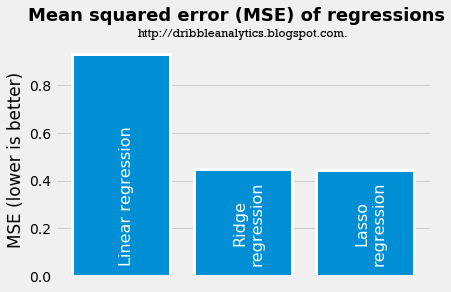

In [36]:
plt.style.use('fivethirtyeight')
mseSF, ax = plt.subplots()

mseScores = [mean_squared_error(ytest, y_predLin), mean_squared_error(ytest, y_predRidge), mean_squared_error(ytest, y_predLasso)]
x_pos = np.arange(len(mseScores))

ax.bar(x_pos, mseScores, edgecolor = 'white', linewidth = 3)

mseNames = ["Linear regression", "Ridge\nregression", "Lasso\nregression"]

labels = [i for i in mseNames]

rects = ax.patches
for rect, label in zip(rects, labels):
    height = .045
    ax.text(rect.get_x() + rect.get_width() / 1.8, height, label,
            ha='center', va='bottom', rotation = 'vertical', color = 'white', size = 16)

mseSF.suptitle("Mean squared error (MSE) of regressions", weight = 'bold', size = 18, y = 1.005)
ax.set_title("http://dribbleanalytics.blogspot.com.", size = 12, fontname = 'Rockwell')
ax.xaxis.set_visible(False)
ax.set_ylabel("MSE (lower is better)")

mseSF.savefig('mse-sf.png', dpi = 400, bbox_inches = 'tight')

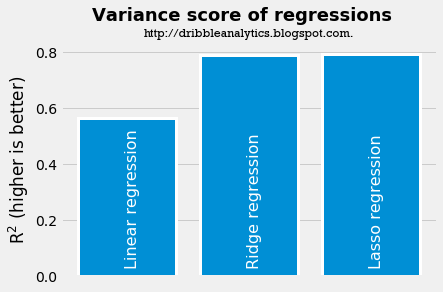

In [37]:
# Let's graph the variance score of all three models

r2sf, ax = plt.subplots()

r2scores = [r2_score(ytest, y_predLin), r2_score(ytest, y_predRidge), r2_score(ytest, y_predLasso)]
x_pos = np.arange(len(r2scores))

ax.bar(x_pos, r2scores, edgecolor = 'white', linewidth = 3)

r2names = ["Linear regression", "Ridge regression", "Lasso regression"]

labels = [i for i in r2names]

rects = ax.patches
for rect, label in zip(rects, labels):
    height = .025
    ax.text(rect.get_x() + rect.get_width() / 1.8, height, label,
            ha='center', va='bottom', rotation = 'vertical', color = 'white', size = 16)

r2sf.suptitle("Variance score of regressions", weight = 'bold', size = 18, y = 1.005)
ax.set_title("http://dribbleanalytics.blogspot.com.", size = 12, fontname = 'Rockwell')
ax.xaxis.set_visible(False)
ax.set_ylabel(r"R$^{\rm 2}$ (higher is better)")

r2sf.savefig('r2-sf.png', dpi = 400, bbox_inches = 'tight')

# Create model machine learning model for PF

In [38]:
dfPF = pd.read_csv('pf-final-data.csv')

train, test = train_test_split(dfPF, test_size = 0.25, random_state = 1)

xtrain = train[['Wingspan (in)', 'Height (in)', 'STL-Col', 'BLK-Col', 'PF-Col', 'STL%-Col', 'BLK%-Col', 'SOS-Col', 'DWS/40-Col', 'DBPM-Col']]
ytrain = train[['DBPM-NBA']]
 
xtest = test[['Wingspan (in)', 'Height (in)', 'STL-Col', 'BLK-Col', 'PF-Col', 'STL%-Col', 'BLK%-Col', 'SOS-Col', 'DWS/40-Col', 'DBPM-Col']]
ytest = test[['DBPM-NBA']]

In [39]:
linReg = linear_model.LinearRegression(fit_intercept = True)
linReg.fit(xtrain, ytrain)

y_predLin = linReg.predict(xtest)

print("Mean squared error: %.3f" % mean_squared_error(ytest, y_predLin))
print('Variance score: %.3f' % r2_score(ytest, y_predLin))

cvScoreLin = cross_val_score(linReg, xtest, ytest, cv = 4, scoring = 'explained_variance')
print("Accuracy (cross validation score): %0.2f (+/- %0.2f)" % (cvScoreLin.mean(), cvScoreLin.std() * 2))

Mean squared error: 1.799
Variance score: -1.647
Accuracy (cross validation score): -16.74 (+/- 52.57)


In [40]:
ridgeReg = linear_model.Ridge(alpha = 5, fit_intercept = True)
ridgeReg.fit(xtrain, ytrain)

y_predRidge = ridgeReg.predict(xtest)

print("Mean squared error: %.3f" % mean_squared_error(ytest, y_predRidge))
print('Variance score: %.3f' % r2_score(ytest, y_predRidge))

cvScoreRidge = cross_val_score(ridgeReg, xtest, ytest, cv = 4, scoring = 'explained_variance')
print("Accuracy (cross validation score): %0.2f (+/- %0.2f)" % (cvScoreRidge.mean(), cvScoreRidge.std() * 2))

Mean squared error: 1.415
Variance score: -1.082
Accuracy (cross validation score): -5.87 (+/- 20.06)


In [41]:
lassoReg = linear_model.Lasso(alpha = .15, max_iter = 100000, fit_intercept = True)
lassoReg.fit(xtrain, ytrain)

y_predLasso = lassoReg.predict(xtest)

print("Mean squared error: %.3f" % mean_squared_error(ytest, y_predLasso))
print('Variance score: %.3f' % r2_score(ytest, y_predLasso))

cvScoreLasso = cross_val_score(lassoReg, xtest, ytest, cv = 4, scoring = 'explained_variance')
print("Accuracy (cross validation score): %0.2f (+/- %0.2f)" % (cvScoreLasso.mean(), cvScoreLasso.std() * 2))

Mean squared error: 1.344
Variance score: -0.977
Accuracy (cross validation score): -7.81 (+/- 28.12)


# The PF model is really bad. Let's make predictions for forwards using the SF model.

In [42]:
linear_sf = linReg.predict(forwardsTest)

for i, j in zip(linear_sf, forwardsNames):
    print(i, j)

[-0.78054177] Marvin Bagley III
[2.08576216] Jaren Jackson Jr.
[-0.92222319] Kevin Knox
[0.67027818] Mikal Bridges
[0.4557466] Miles Bridges
[1.66621946] Zhaire Smith
[1.13345591] Robert Williams
[-0.60996339] Keita Bates-Diop
[1.00564335] Jacob Evans
[-0.45155827] Melvin Frazier


In [43]:
ridge_sf = ridgeReg.predict(forwardsTest)

for i, j in zip(ridge_sf, forwardsNames):
    print(i, j)

[-0.57591898] Marvin Bagley III
[1.91222525] Jaren Jackson Jr.
[-0.79352943] Kevin Knox
[0.44486549] Mikal Bridges
[0.56690881] Miles Bridges
[1.55979362] Zhaire Smith
[0.98840259] Robert Williams
[-0.47885767] Keita Bates-Diop
[0.9121198] Jacob Evans
[-0.72938457] Melvin Frazier


In [44]:
lasso_sf = lassoReg.predict(forwardsTest)

for i, j in zip(lasso_sf, forwardsNames):
    print(i, j)

-0.40170792898798524 Marvin Bagley III
1.892494760581359 Jaren Jackson Jr.
-0.7881238517459686 Kevin Knox
0.30201264261744853 Mikal Bridges
0.5304504249363617 Miles Bridges
1.2838838500318897 Zhaire Smith
1.1341028094483274 Robert Williams
-0.15496852911657655 Keita Bates-Diop
0.7238873153105896 Jacob Evans
-0.737660461306989 Melvin Frazier


[['Kevin Knox', -0.9222231907298912], ['Marvin Bagley III', -0.780541774390862], ['Keita Bates-Diop', -0.6099633889030223], ['Melvin Frazier', -0.45155826882642813], ['Miles Bridges', 0.455746596821907], ['Mikal Bridges', 0.670278179926008], ['Jacob Evans', 1.0056433534467253], ['Robert Williams', 1.1334559107999311], ['Zhaire Smith', 1.6662194575574745], ['Jaren Jackson Jr.', 2.0857621625443237]]


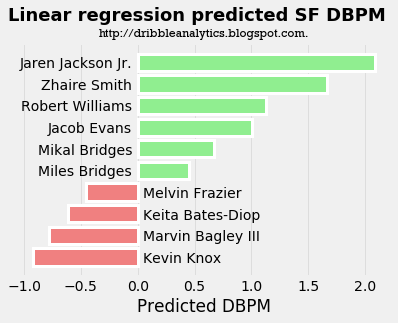

In [45]:
# Let's plot the linear regression predictions

plt.style.use('fivethirtyeight')
linRegSF, ax = plt.subplots()

linearPlot = []

for i in linear_sf:
    linearPlot.append(float(i))
    
combinedLinear = [[i, j] for i, j in zip(forwardsNames, linearPlot)]

sortedLinear = sorted(combinedLinear, key = itemgetter(1))
print(sortedLinear)

sortedLinearData = [row[1] for row in sortedLinear]
y_pos = np.arange(len(sortedLinearData))

colorList = []

for i in sortedLinearData:
    if i < 0:
        colorList.append('lightcoral')
    elif i > 0:
        colorList.append('lightgreen')

ax.barh(y_pos, sortedLinearData, color = colorList, edgecolor = 'white', linewidth = 3)

labels = [row[0] for row in sortedLinear]

rects = ax.patches
for rect, label in zip(rects, labels):
    height = rect.get_y()
    if rect.get_y() < 3:
        ax.text(rect.get_x() + .05, height, label,
        ha='left', va='bottom', color = 'black')
    elif rect.get_y() >= 3:
        ax.text(rect.get_x() - .05, height, label,
        ha='right', va='bottom', color = 'black')

linRegSF.suptitle("Linear regression predicted SF DBPM", weight = 'bold', size = 18, y = 1.005)
ax.set_title("http://dribbleanalytics.blogspot.com.", size = 12, fontname = 'Rockwell')
ax.yaxis.set_visible(False)
ax.set_xlabel("Predicted DBPM")
ax.grid(alpha = .5)

linRegSF.savefig('lin-reg-sf.png', dpi = 400, bbox_inches = 'tight')

[['Kevin Knox', -0.7935294266675967], ['Melvin Frazier', -0.729384567174769], ['Marvin Bagley III', -0.575918978839578], ['Keita Bates-Diop', -0.4788576746139377], ['Mikal Bridges', 0.44486549432785694], ['Miles Bridges', 0.5669088112486627], ['Jacob Evans', 0.912119800682504], ['Robert Williams', 0.9884025938504735], ['Zhaire Smith', 1.5597936190390485], ['Jaren Jackson Jr.', 1.9122252466311274]]


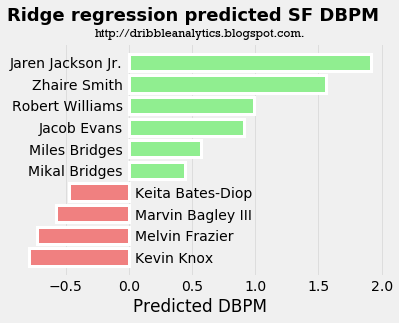

In [46]:
# Let's plot the ridge regression predictions

plt.style.use('fivethirtyeight')
ridgeRegSF, ax = plt.subplots()

ridgePlot = []

for i in ridge_sf:
    ridgePlot.append(float(i))
    
combinedRidge = [[i, j] for i, j in zip(forwardsNames, ridgePlot)]

sortedRidge = sorted(combinedRidge, key = itemgetter(1))
print(sortedRidge)

sortedRidgeData = [row[1] for row in sortedRidge]
y_pos = np.arange(len(sortedRidgeData))

colorList = []

for i in sortedRidgeData:
    if i < 0:
        colorList.append('lightcoral')
    elif i > 0:
        colorList.append('lightgreen')

ax.barh(y_pos, sortedRidgeData, color = colorList, edgecolor = 'white', linewidth = 3)

labels = [row[0] for row in sortedRidge]

rects = ax.patches
for rect, label in zip(rects, labels):
    height = rect.get_y()
    if rect.get_y() < 3:
        ax.text(rect.get_x() + .05, height, label,
        ha='left', va='bottom', color = 'black')
    elif rect.get_y() >= 3:
        ax.text(rect.get_x() - .05, height, label,
        ha='right', va='bottom', color = 'black')
        
ridgeRegSF.suptitle("Ridge regression predicted SF DBPM", weight = 'bold', size = 18, y = 1.005)
ax.set_title("http://dribbleanalytics.blogspot.com.", size = 12, fontname = 'Rockwell')
ax.yaxis.set_visible(False)
ax.set_xlabel("Predicted DBPM")
ax.grid(alpha = .5)

ridgeRegSF.savefig('ridge-reg-sf.png', dpi = 400, bbox_inches = 'tight')

[['Kevin Knox', -0.7881238517459686], ['Melvin Frazier', -0.737660461306989], ['Marvin Bagley III', -0.40170792898798524], ['Keita Bates-Diop', -0.15496852911657655], ['Mikal Bridges', 0.30201264261744853], ['Miles Bridges', 0.5304504249363617], ['Jacob Evans', 0.7238873153105896], ['Robert Williams', 1.1341028094483274], ['Zhaire Smith', 1.2838838500318897], ['Jaren Jackson Jr.', 1.892494760581359]]


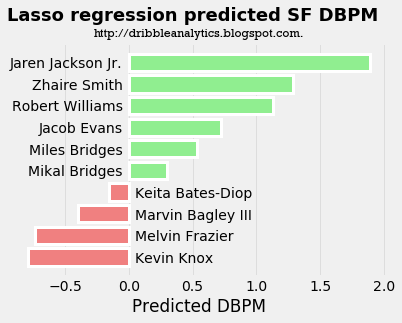

In [47]:
# Let's plot the lasso regression predictions

plt.style.use('fivethirtyeight')
lassoRegSF, ax = plt.subplots()

lassoPlot = []

for i in lasso_sf:
    lassoPlot.append(float(i))
    
combinedLasso = [[i, j] for i, j in zip(forwardsNames, lassoPlot)]

sortedLasso = sorted(combinedLasso, key = itemgetter(1))
print(sortedLasso)

sortedLassoData = [row[1] for row in sortedLasso]
y_pos = np.arange(len(sortedLassoData))

colorList = []

for i in sortedLassoData:
    if i < 0:
        colorList.append('lightcoral')
    elif i > 0:
        colorList.append('lightgreen')
        
ax.barh(y_pos, sortedLassoData, color = colorList, edgecolor = 'white', linewidth = 3)

labels = [row[0] for row in sortedLasso]

rects = ax.patches
for rect, label in zip(rects, labels):
    height = rect.get_y()
    if rect.get_y() < 3:
        ax.text(rect.get_x() + .05, height, label,
        ha='left', va='bottom', color = 'black')
    elif rect.get_y() >= 3:
        ax.text(rect.get_x() - .05, height, label,
        ha='right', va='bottom', color = 'black')

lassoRegSF.suptitle("Lasso regression predicted SF DBPM", weight = 'bold', size = 18, y = 1.005)
ax.set_title("http://dribbleanalytics.blogspot.com.", size = 12, fontname = 'Rockwell')
ax.yaxis.set_visible(False)
ax.set_xlabel("Predicted DBPM")
ax.grid(alpha = .5)

lassoRegSF.savefig('lasso-reg-sf.png', dpi = 400, bbox_inches = 'tight')

[['Kevin Knox', -0.8346254897144855], ['Melvin Frazier', -0.639534432436062], ['Marvin Bagley III', -0.5860562274061417], ['Keita Bates-Diop', -0.4145965308778455], ['Mikal Bridges', 0.4723854389571045], ['Miles Bridges', 0.5177019443356438], ['Jacob Evans', 0.8805501564799396], ['Robert Williams', 1.0853204380329107], ['Zhaire Smith', 1.5032989755428041], ['Jaren Jackson Jr.', 1.9634940565856034]]


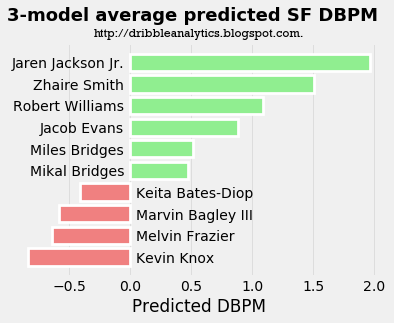

In [48]:
# Let's see who has the highest average DBPM among the three models

avgSF, ax = plt.subplots()

averagePred = []

for i, j, h in zip(linear_sf, ridge_sf, lasso_sf):
    averagePred.append(float((i + j + h) / 3))

combinedAvg = [[i, j] for i, j in zip(forwardsNames, averagePred)]

sortedAvg = sorted(combinedAvg, key = itemgetter(1))
print(sortedAvg)

sortedAvgData = [row[1] for row in sortedAvg]
y_pos = np.arange(len(sortedAvgData))

colorList = []

for i in sortedAvgData:
    if i < 0:
        colorList.append('lightcoral')
    elif i > 0:
        colorList.append('lightgreen')

ax.barh(y_pos, sortedAvgData, color = colorList, edgecolor = 'white', linewidth = 2.75)

labels = [row[0] for row in sortedAvg]

rects = ax.patches
for rect, label in zip(rects, labels):
    height = rect.get_y()
    if rect.get_y() < 3:
        ax.text(rect.get_x() + .05, height, label,
        ha='left', va='bottom', color = 'black')
    elif rect.get_y() >= 3:
        ax.text(rect.get_x() - .05, height, label,
        ha='right', va='bottom', color = 'black')

avgSF.suptitle("3-model average predicted SF DBPM", weight = 'bold', size = 18, y = 1.005)
ax.set_title("http://dribbleanalytics.blogspot.com.", size = 12, fontname = 'Rockwell')
ax.yaxis.set_visible(False)
ax.set_xlabel("Predicted DBPM")
ax.grid(alpha = .5)

avgSF.savefig('avg-sf.png', dpi = 400, bbox_inches = 'tight')

# Create machine learning model for centers

In [49]:
train, test = train_test_split(dfCenters, test_size = 0.1, random_state = 99)

xtrain = train[['Wingspan (in)', 'Height (in)', 'STL-Col', 'BLK-Col', 'PF-Col', 'STL%-Col', 'BLK%-Col', 'SOS-Col', 'DWS/40-Col', 'DBPM-Col']]
ytrain = train[['DBPM-NBA']]
 
xtest = test[['Wingspan (in)', 'Height (in)', 'STL-Col', 'BLK-Col', 'PF-Col', 'STL%-Col', 'BLK%-Col', 'SOS-Col', 'DWS/40-Col', 'DBPM-Col']]
ytest = test[['DBPM-NBA']]

In [50]:
linReg = linear_model.LinearRegression(fit_intercept = False)
linReg.fit(xtrain, ytrain)

y_predLin = linReg.predict(xtest)

print("Mean squared error: %.3f" % mean_squared_error(ytest, y_predLin))
print('Variance score: %.3f' % r2_score(ytest, y_predLin))

cvScoreLin = cross_val_score(linReg, xtest, ytest, cv = 2, scoring = 'explained_variance')
print("Accuracy (cross validation score): %0.2f (+/- %0.2f)" % (cvScoreLin.mean(), cvScoreLin.std() * 2))

Mean squared error: 0.655
Variance score: 0.742
Accuracy (cross validation score): 0.55 (+/- 0.90)


In [51]:
ridgeReg = linear_model.Ridge(alpha = .25, fit_intercept = False)
ridgeReg.fit(xtrain, ytrain)

y_predRidge = ridgeReg.predict(xtest)

print("Mean squared error: %.3f" % mean_squared_error(ytest, y_predRidge))
print('Variance score: %.3f' % r2_score(ytest, y_predRidge))

cvScoreRidge = cross_val_score(ridgeReg, xtest, ytest, cv = 2, scoring = 'explained_variance')
print("Accuracy (cross validation score): %0.2f (+/- %0.2f)" % (cvScoreRidge.mean(), cvScoreRidge.std() * 2))

Mean squared error: 0.659
Variance score: 0.741
Accuracy (cross validation score): 0.55 (+/- 0.90)


In [52]:
lassoReg = linear_model.Lasso(alpha = .001, max_iter = 100000, fit_intercept = False)
lassoReg.fit(xtrain, ytrain)

y_predLasso = lassoReg.predict(xtest)

print("Mean squared error: %.3f" % mean_squared_error(ytest, y_predLasso))
print('Variance score: %.3f' % r2_score(ytest, y_predLasso))

cvScoreLasso = cross_val_score(lassoReg, xtest, ytest, cv = 2, scoring = 'explained_variance')
print("Accuracy (cross validation score): %0.2f (+/- %0.2f)" % (cvScoreLasso.mean(), cvScoreLasso.std() * 2))

Mean squared error: 0.657
Variance score: 0.741
Accuracy (cross validation score): 0.60 (+/- 0.79)


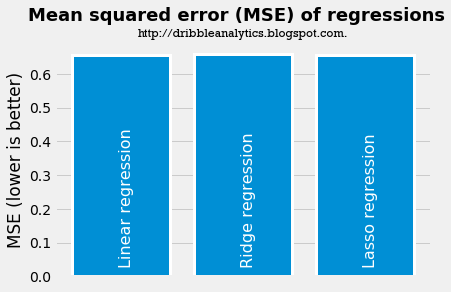

In [53]:
plt.style.use('fivethirtyeight')
mseCenters, ax = plt.subplots()

mseScores = [mean_squared_error(ytest, y_predLin), mean_squared_error(ytest, y_predRidge), mean_squared_error(ytest, y_predLasso)]
x_pos = np.arange(len(mseScores))

ax.bar(x_pos, mseScores, edgecolor = 'white', linewidth = 3)

mseNames = ["Linear regression", "Ridge regression", "Lasso regression"]

labels = [i for i in mseNames]

rects = ax.patches
for rect, label in zip(rects, labels):
    height = .025
    ax.text(rect.get_x() + rect.get_width() / 1.8, height, label,
            ha='center', va='bottom', rotation = 'vertical', color = 'white', size = 16)

mseCenters.suptitle("Mean squared error (MSE) of regressions", weight = 'bold', size = 18, y = 1.005)
ax.set_title("http://dribbleanalytics.blogspot.com.", size = 12, fontname = 'Rockwell')
ax.xaxis.set_visible(False)
ax.set_ylabel("MSE (lower is better)")

mseCenters.savefig('mse-centers.png', dpi = 400, bbox_inches = 'tight')

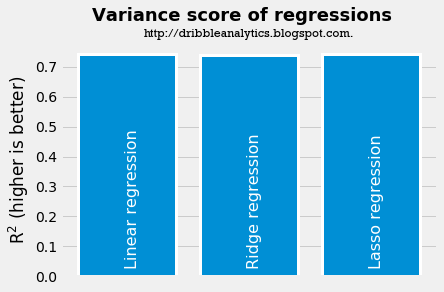

In [54]:
# Let's graph the variance score of all three models

r2centers, ax = plt.subplots()

r2scores = [r2_score(ytest, y_predLin), r2_score(ytest, y_predRidge), r2_score(ytest, y_predLasso)]
x_pos = np.arange(len(r2scores))

ax.bar(x_pos, r2scores, edgecolor = 'white', linewidth = 3)

r2names = ["Linear regression", "Ridge regression", "Lasso regression"]

labels = [i for i in r2names]

rects = ax.patches
for rect, label in zip(rects, labels):
    height = .025
    ax.text(rect.get_x() + rect.get_width() / 1.8, height, label,
            ha='center', va='bottom', rotation = 'vertical', color = 'white', size = 16)

r2centers.suptitle("Variance score of regressions", weight = 'bold', size = 18, y = 1.005)
ax.set_title("http://dribbleanalytics.blogspot.com.", size = 12, fontname = 'Rockwell')
ax.xaxis.set_visible(False)
ax.set_ylabel(r"R$^{\rm 2}$ (higher is better)")

r2centers.savefig('r2-centers.png', dpi = 400, bbox_inches = 'tight')

# Predict defense for centers using the models 

In [55]:
linear_centers = linReg.predict(centersTest)

for i, j in zip(linear_centers, centersNames):
    print(i, j)

[0.60404661] Deandre Ayton
[1.30004141] Marvin Bagley III
[1.62625793] Jaren Jackson Jr.
[1.91557481] Mohamed Bamba
[1.22216083] Wendell Carter Jr.
[1.66084026] Robert Williams
[1.06255206] Moritz Wagner


In [56]:
ridge_centers = ridgeReg.predict(centersTest)

for i, j in zip(ridge_centers, centersNames):
    print(i, j)

[0.7404083] Deandre Ayton
[1.14123339] Marvin Bagley III
[1.72861195] Jaren Jackson Jr.
[1.8752271] Mohamed Bamba
[1.29532305] Wendell Carter Jr.
[1.68242293] Robert Williams
[0.88514168] Moritz Wagner


In [57]:
lasso_centers = lassoReg.predict(centersTest)

for i, j in zip(lasso_centers, centersNames):
    print(i, j)

0.7412568649092068 Deandre Ayton
1.2159823220820092 Marvin Bagley III
1.7134973875319484 Jaren Jackson Jr.
1.8962867418854132 Mohamed Bamba
1.268839227746847 Wendell Carter Jr.
1.665427834791194 Robert Williams
0.8404222149986726 Moritz Wagner


[['Deandre Ayton', 0.6040466081645667], ['Moritz Wagner', 1.0625520581419945], ['Wendell Carter Jr.', 1.2221608347831625], ['Marvin Bagley III', 1.300041409535212], ['Jaren Jackson Jr.', 1.6262579338351217], ['Robert Williams', 1.6608402623940854], ['Mohamed Bamba', 1.9155748103286199]]


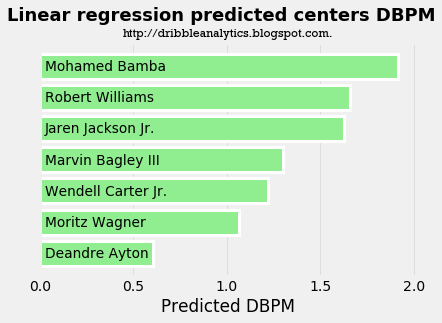

In [58]:
# Let's plot the linear regression predictions

plt.style.use('fivethirtyeight')
linRegCenters, ax = plt.subplots()

linearPlot = []

for i in linear_centers:
    linearPlot.append(float(i))
    
combinedLinear = [[i, j] for i, j in zip(centersNames, linearPlot)]

sortedLinear = sorted(combinedLinear, key = itemgetter(1))
print(sortedLinear)

sortedLinearData = [row[1] for row in sortedLinear]
y_pos = np.arange(len(sortedLinearData))

ax.barh(y_pos, sortedLinearData, color = 'lightgreen', edgecolor = 'white', linewidth = 3)

labels = [row[0] for row in sortedLinear]

rects = ax.patches
for rect, label in zip(rects, labels):
    height = rect.get_y() + .15
    ax.text(rect.get_x() + .025, height, label,
    ha='left', va='bottom', color = 'black', size = 13.75)


linRegCenters.suptitle("Linear regression predicted centers DBPM", weight = 'bold', size = 18, y = 1.005)
ax.set_title("http://dribbleanalytics.blogspot.com.", size = 12, fontname = 'Rockwell')
ax.yaxis.set_visible(False)
ax.set_xlabel("Predicted DBPM")
ax.grid(alpha = .5)

linRegCenters.savefig('lin-reg-centers.png', dpi = 400, bbox_inches = 'tight')

[['Deandre Ayton', 0.7404083034442777], ['Moritz Wagner', 0.8851416809045565], ['Marvin Bagley III', 1.1412333917464037], ['Wendell Carter Jr.', 1.2953230503106106], ['Robert Williams', 1.6824229299679867], ['Jaren Jackson Jr.', 1.7286119477382886], ['Mohamed Bamba', 1.8752270954843977]]


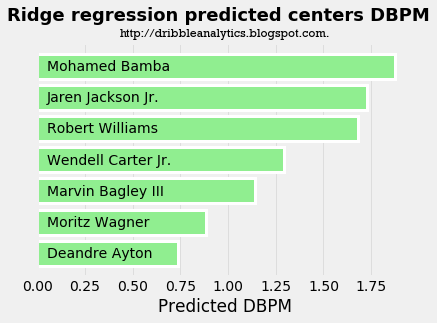

In [59]:
# Let's plot the ridge regression predictions

plt.style.use('fivethirtyeight')
ridgeRegCenters, ax = plt.subplots()

ridgePlot = []

for i in ridge_centers:
    ridgePlot.append(float(i))
    
combinedRidge = [[i, j] for i, j in zip(centersNames, ridgePlot)]

sortedRidge = sorted(combinedRidge, key = itemgetter(1))
print(sortedRidge)

sortedRidgeData = [row[1] for row in sortedRidge]
y_pos = np.arange(len(sortedRidgeData))

ax.barh(y_pos, sortedRidgeData, color = 'lightgreen', edgecolor = 'white', linewidth = 3)

labels = [row[0] for row in sortedRidge]

rects = ax.patches
for rect, label in zip(rects, labels):
    height = rect.get_y() + .15
    ax.text(rect.get_x() + .05, height, label,
    ha='left', va='bottom', color = 'black')
        
ridgeRegCenters.suptitle("Ridge regression predicted centers DBPM", weight = 'bold', size = 18, y = 1.005)
ax.set_title("http://dribbleanalytics.blogspot.com.", size = 12, fontname = 'Rockwell')
ax.yaxis.set_visible(False)
ax.set_xlabel("Predicted DBPM")
ax.grid(alpha = .5)

ridgeRegCenters.savefig('ridge-reg-centers.png', dpi = 400, bbox_inches = 'tight')

[['Deandre Ayton', 0.7412568649092068], ['Moritz Wagner', 0.8404222149986726], ['Marvin Bagley III', 1.2159823220820092], ['Wendell Carter Jr.', 1.268839227746847], ['Robert Williams', 1.665427834791194], ['Jaren Jackson Jr.', 1.7134973875319484], ['Mohamed Bamba', 1.8962867418854132]]


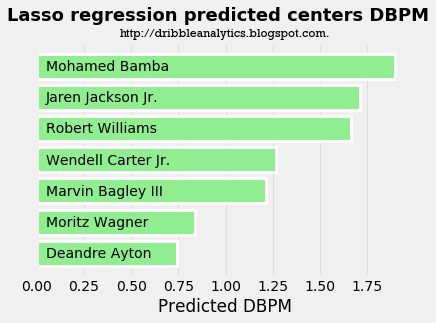

In [60]:
# Let's plot the lasso regression predictions

plt.style.use('fivethirtyeight')
lassoRegCenters, ax = plt.subplots()

lassoPlot = []

for i in lasso_centers:
    lassoPlot.append(float(i))
    
combinedLasso = [[i, j] for i, j in zip(centersNames, lassoPlot)]

sortedLasso = sorted(combinedLasso, key = itemgetter(1))
print(sortedLasso)

sortedLassoData = [row[1] for row in sortedLasso]
y_pos = np.arange(len(sortedLassoData))
     
ax.barh(y_pos, sortedLassoData, color = 'lightgreen', edgecolor = 'white', linewidth = 3)

labels = [row[0] for row in sortedLasso]

rects = ax.patches
for rect, label in zip(rects, labels):
    height = rect.get_y() + .15
    ax.text(rect.get_x() + .05, height, label,
    ha='left', va='bottom', color = 'black')

lassoRegCenters.suptitle("Lasso regression predicted centers DBPM", weight = 'bold', size = 18, y = 1.005)
ax.set_title("http://dribbleanalytics.blogspot.com.", size = 12, fontname = 'Rockwell')
ax.yaxis.set_visible(False)
ax.set_xlabel("Predicted DBPM")
ax.grid(alpha = .5)

lassoRegCenters.savefig('lasso-reg-centers.png', dpi = 400, bbox_inches = 'tight')

[['Deandre Ayton', 0.6952372588393504], ['Moritz Wagner', 0.9293719846817412], ['Marvin Bagley III', 1.219085707787875], ['Wendell Carter Jr.', 1.2621077042802067], ['Robert Williams', 1.6695636757177554], ['Jaren Jackson Jr.', 1.689455756368453], ['Mohamed Bamba', 1.895696215899477]]


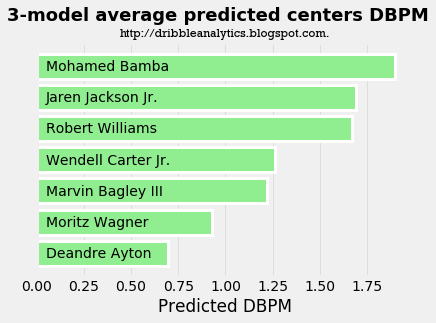

In [61]:
# Let's see who has the highest average DBPM among the three models

avgCenters, ax = plt.subplots()

averagePred = []

for i, j, h in zip(linear_centers, ridge_centers, lasso_centers):
    averagePred.append(float((i + j + h) / 3))

combinedAvg = [[i, j] for i, j in zip(centersNames, averagePred)]

sortedAvg = sorted(combinedAvg, key = itemgetter(1))
print(sortedAvg)

sortedAvgData = [row[1] for row in sortedAvg]
y_pos = np.arange(len(sortedAvgData))

ax.barh(y_pos, sortedAvgData, color = 'lightgreen', edgecolor = 'white', linewidth = 3)

labels = [row[0] for row in sortedAvg]

rects = ax.patches
for rect, label in zip(rects, labels):
    height = rect.get_y() + .15
    ax.text(rect.get_x() + .05, height, label,
    ha='left', va='bottom', color = 'black')

avgCenters.suptitle("3-model average predicted centers DBPM", weight = 'bold', size = 18, y = 1.005)
ax.set_title("http://dribbleanalytics.blogspot.com.", size = 12, fontname = 'Rockwell')
ax.yaxis.set_visible(False)
ax.set_xlabel("Predicted DBPM")
ax.grid(alpha = .5)

avgCenters.savefig('avg-centers.png', dpi = 400, bbox_inches = 'tight')